<h1 align='center'> Image Classification </h1>

<p> In this notebook we will learn about how to work out basic image classification task.<br>How does it all work are divided into various cells and work. </p>

<h3> 0. Installing Dependencies </h3>

In [3]:
!pip3 install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 105.1 kB/s eta 0:00:00m eta 0:00:010:00:04
  Using cached kiwisolver-1.4.5-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 67.9 kB/s eta 0:00:00m eta 0:00:010:00:02m
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached contourpy-1.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (310 kB)


<h3>1. Importing Dependencies </h3>

In [23]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image

print(f'Current Tensorflow Version: {tf.__version__}')

Current Tensorflow Version: 2.15.0


In [81]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 142s 1us/step


<h3> 2. Visualizing Dataset </h3>

Let's Visualize the dataset and also assign them with class labels.

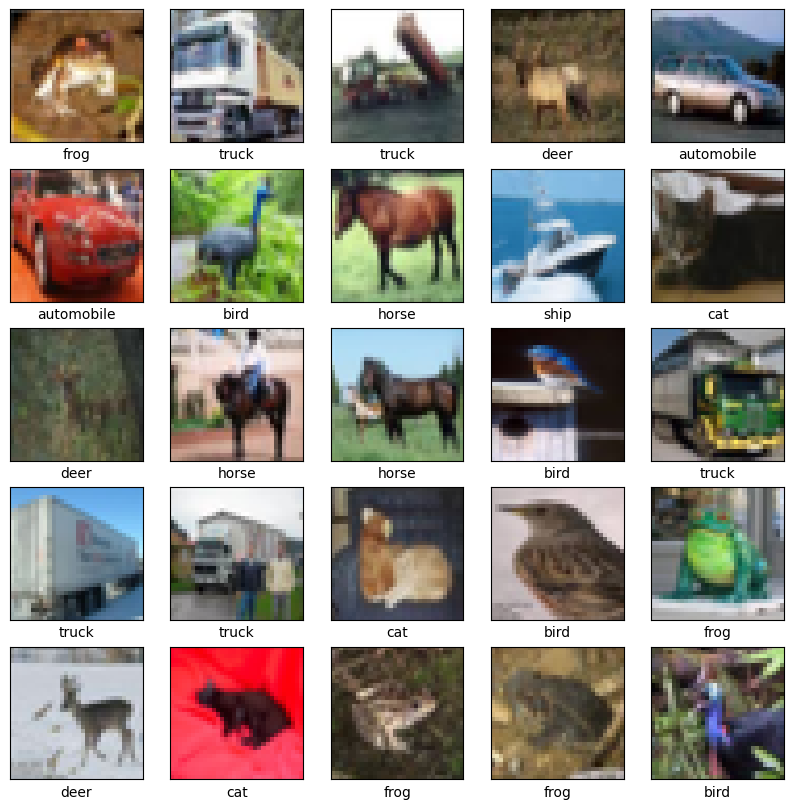

In [82]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [136]:
# Define model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(32,32,3)),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),


    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10,activation='softmax')
])

number_of_epochs=100

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',     # Metric to monitor (e.g., validation loss)
    patience=int(number_of_epochs/10),             # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)

# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Train model
history=model.fit(train_images, train_labels, epochs=number_of_epochs,callbacks=early_stopping, validation_data=(test_images, test_labels))


Epoch 1/100
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4708 - accuracy: 0.4733 - val_loss: 1.3466 - val_accuracy: 0.5201
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1173 - accuracy: 0.6088 - val_loss: 1.0219 - val_accuracy: 0.6419
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9638 - accuracy: 0.6655 - val_loss: 1.1574 - val_accuracy: 0.5957
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8604 - accuracy: 0.7044 - val_loss: 0.9068 - val_accuracy: 0.6905
Epoch 5/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7851 - accuracy: 0.7297 - val_loss: 0.9963 - val_accuracy: 0.6576
Epoch 6/100
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7225 - accuracy: 0.7499 - val_loss: 0.9351 - val_accuracy: 0.6936
Epoch 7/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6731 - accuracy: 0.7654 - val_loss: 0.8640 - val_a

313/313 - 1s - loss: 0.8255 - accuracy: 0.7389 - 965ms/epoch - 3ms/step


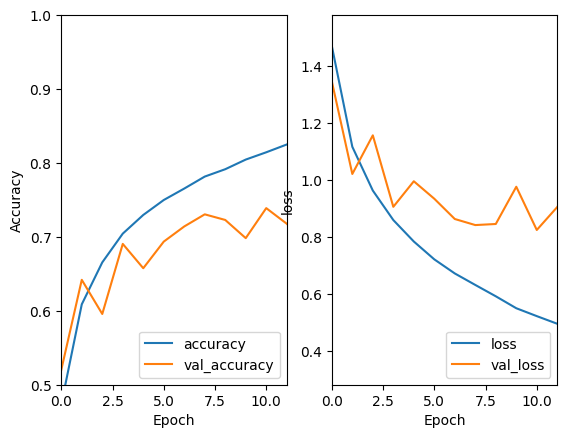

In [141]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0,len(history.history['accuracy'])-int(number_of_epochs/10)])
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.xlim([0,len(history.history['accuracy'])-int(number_of_epochs/10)])

plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

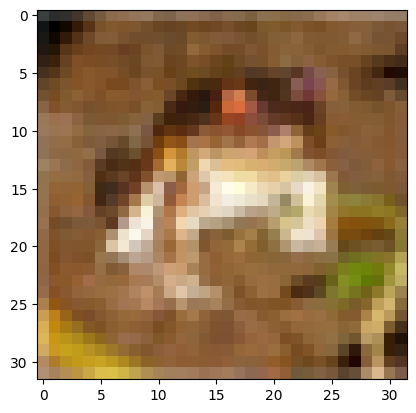

1/1 [==============================] - 0s 13ms/step
Predicted Class: frog


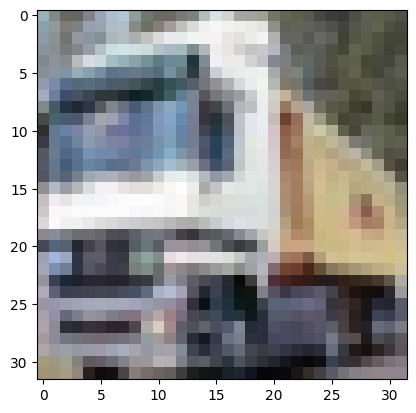

1/1 [==============================] - 0s 12ms/step
Predicted Class: truck


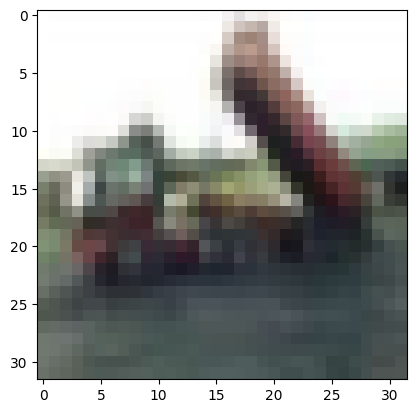

1/1 [==============================] - 0s 12ms/step
Predicted Class: truck


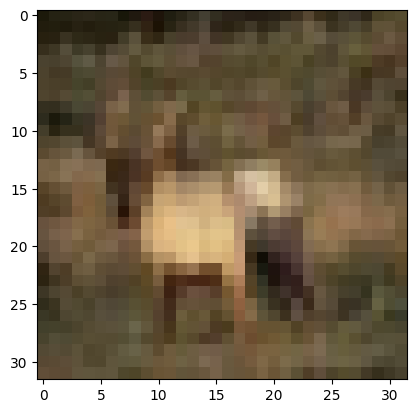

1/1 [==============================] - 0s 12ms/step
Predicted Class: deer


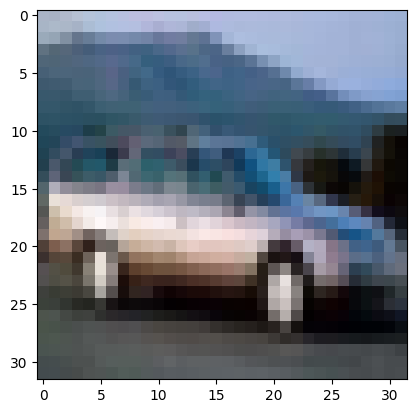

1/1 [==============================] - 0s 12ms/step
Predicted Class: automobile


In [160]:
# works at index 1
for indx in range(5):
    image_val = train_images[indx]
    plt.imshow(image_val)
    plt.show()  # Show the image plot
    pred_index = np.argmax(model.predict(image_val.reshape(1, 32, 32, 3)))
    print(f'Predicted Class: {class_names[pred_index]}')